In [13]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
load_dotenv()
import os
OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")
os.environ["OPENAI_API_KEY"]=OPENAI_API_KEY
openai_model=ChatOpenAI(model="gpt-4o")
openai_model.invoke("hi")

from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

import os
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY="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"
os.environ["TAVILY_API_KEY"]=TAVILY_API_KEY

In [14]:
class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

In [15]:

tavily=TavilySearchResults()

In [16]:

tools = [tavily]

In [17]:

llm_with_tools = openai_model.bind_tools(tools)

In [18]:

def ai_assistant(state: AgentState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [19]:
memory = MemorySaver()

In [20]:
graph_builder = StateGraph(AgentState)
graph_builder.add_node("ai_assistant", ai_assistant)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [21]:

graph_builder.add_edge(START, "ai_assistant")

graph_builder.add_conditional_edges(
    "ai_assistant",
    tools_condition,
)
graph_builder.add_edge("tools", "ai_assistant")

In [22]:

app2 = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt __after__ tools, if desired.
    # interrupt_after=["tools"]
)

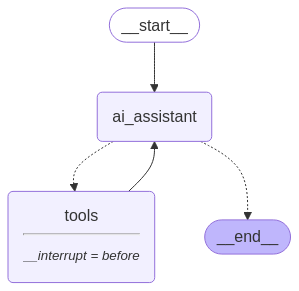

In [23]:

from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [24]:

user_input = "what is current a capital of india?"
config = {"configurable": {"thread_id": "1"}}

In [25]:
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [26]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is current a capital of india?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_tzUUndQ92QRx1LFIfIinEZXR)
 Call ID: call_tzUUndQ92QRx1LFIfIinEZXR
  Args:
    query: current capital of India 2023


In [27]:
snapshot = app2.get_state(config)

In [28]:

snapshot.next

('tools',)

In [29]:

last_message=snapshot.values["messages"][-1]

In [30]:

last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'current capital of India 2023'},
  'id': 'call_tzUUndQ92QRx1LFIfIinEZXR',
  'type': 'tool_call'}]

In [31]:
events = app2.stream(None, config, stream_mode="values")

In [32]:

for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()
     

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_tzUUndQ92QRx1LFIfIinEZXR)
 Call ID: call_tzUUndQ92QRx1LFIfIinEZXR
  Args:
    query: current capital of India 2023
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "States and Capitals of India 2025 PDF in English Download - Guidely", "url": "https://guidely.in/blog/states-and-capitals-of-india", "content": "The capital of India is New Delhi. Q. How many union territories are there ... Bundle PDF Course 2023; Ultimate Bundle PDF Course 2022; English Bundle", "score": 0.72907686}, {"title": "States And Capitals Of India 2025, 28 States And 8 Union Territories ...", "url": "https://pwonlyias.com/states-and-capitals-of-india/", "content": "The capital of India is New Delhi. India follows a parliamentary form of government.", "score": 0.6271529}, {"title": "What is the capital of India? S

In [33]:

user_input = "what is a weather there?"

config = {"configurable": {"thread_id": "1"}}

In [34]:
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [35]:

for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()
     

================================ Human Message =================================

what is a weather there?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_YVJ5isRGASuOPihQGWtpjv6R)
 Call ID: call_YVJ5isRGASuOPihQGWtpjv6R
  Args:
    query: current weather in New Delhi


In [36]:

snapshot = app2.get_state(config)

In [37]:

snapshot.next

('tools',)

In [38]:

last_message=snapshot.values["messages"][-1]

In [39]:
last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'current weather in New Delhi'},
  'id': 'call_YVJ5isRGASuOPihQGWtpjv6R',
  'type': 'tool_call'}]

In [40]:
events = app2.stream(None, config, stream_mode="values")

In [41]:

for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_YVJ5isRGASuOPihQGWtpjv6R)
 Call ID: call_YVJ5isRGASuOPihQGWtpjv6R
  Args:
    query: current weather in New Delhi
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Weather in New Delhi", "url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'New Delhi', 'region': 'Delhi', 'country': 'India', 'lat': 28.6, 'lon': 77.2, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1744564799, 'localtime': '2025-04-13 22:49'}, 'current': {'last_updated_epoch': 1744564500, 'last_updated': '2025-04-13 22:45', 'temp_c': 27.3, 'temp_f': 81.1, 'is_day': 0, 'condition': {'text': 'Mist', 'icon': '//cdn.weatherapi.com/weather/64x64/night/143.png', 'code': 1030}, 'wind_mph': 3.4, 'wind_kph': 5.4, 'wind_degree': 99, 'wind_dir': 'E', 'pressure_mb': 1009.0, 'pressure_in': 29.8, 'precip_mm': 0.0, 'pre

In [42]:

app2.get_state(config)

StateSnapshot(values={'messages': [HumanMessage(content='what is current a capital of india?', additional_kwargs={}, response_metadata={}, id='04274344-1659-47a8-9656-caaba03d9839'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_tzUUndQ92QRx1LFIfIinEZXR', 'function': {'arguments': '{"query":"current capital of India 2023"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 87, 'total_tokens': 112, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_92f14e8683', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b2e91930-4426-47df-9bb0-102239f15a47-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'current capital of I

In [43]:

snapshot=app2.get_state(config)
     

In [44]:

snapshot.next

()

In [46]:

user_input = "give me the recent news there?"

config = {"configurable": {"thread_id": "1"}}

In [47]:
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [48]:

for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

give me the recent news there?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_1nPtpDj8Hs8iZo59wIz4RWCz)
 Call ID: call_1nPtpDj8Hs8iZo59wIz4RWCz
  Args:
    query: recent news in New Delhi


In [49]:

snapshot=app2.get_state(config)

In [50]:
snapshot.next

('tools',)

In [51]:

current_message = snapshot.values["messages"][-1]

In [52]:
current_message.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_1nPtpDj8Hs8iZo59wIz4RWCz)
 Call ID: call_1nPtpDj8Hs8iZo59wIz4RWCz
  Args:
    query: recent news in New Delhi


In [53]:
tool_call_id = current_message.tool_calls[0]["id"] 

In [54]:
tool_call_id

'call_1nPtpDj8Hs8iZo59wIz4RWCz'

In [55]:
from langchain_core.messages import AIMessage, ToolMessage
     

In [56]:

answer = "it is just related to raining which is happing on daily basis in delhi"

In [57]:

new_messages = [
    ToolMessage(content=answer, tool_call_id=tool_call_id),
    AIMessage(content=answer),
]

In [58]:

app2.update_state(
    config,
    {"messages": new_messages},
)
  

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0188c0-f768-6895-800c-1b7b1556f964'}}

In [59]:

print(app2.get_state(config).values["messages"][-1:])

[AIMessage(content='it is just related to raining which is happing on daily basis in delhi', additional_kwargs={}, response_metadata={}, id='76ddbb73-6b83-44e4-b0ec-e7b2de0eb42b')]
